# Data Mining - Unsupervised Learning Algorithms



## K-means Clustering Method with Self-generated Data

In this example, we are going to generate a set of random samples and then use the k-means algorithm to cluster them. The samples will be created around two specific points. Therefore, it would be logical to group them into two clusters. Since initially, in a real-world problem, the most suitable number of k clusters is unknown, we will first test with two (the optimal value) and then with 4 and 8 clusters. To evaluate the quality of each clustering process, we will use the average silhouette score. The silhouette of each sample assesses how well or poorly the sample is classified in the cluster it has been assigned to. This is done using a formula that takes into account the distance to the samples of its cluster and the distance to the samples of the nearest neighboring cluster.

**When testing the code shown, it is important to bear in mind that the samples are generated randomly and also that the k-means algorithm has a random initialization. Therefore, each execution will yield slightly different results.**


Firsly, we generate the samples randomly using the points [0,0] and [5,5] as centers

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from collections import Counter

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import pairwise_distances


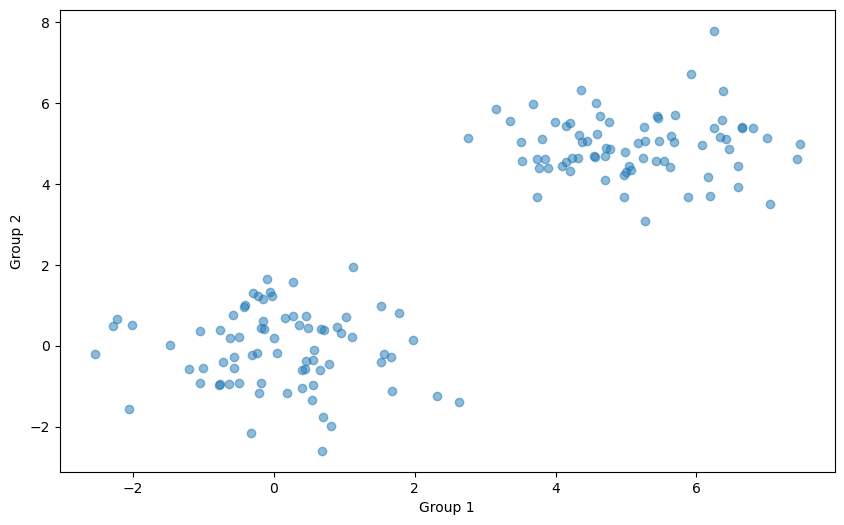

In [2]:
n = 150  # number of samples
p = 2    # dimension

sigma = 1  # variance of the distribution
mean1 = 0  # center of the first group
mean2 = 5  # center of the second group

n1 = round(n / 2)  # number of samples of the first group
n2 = round(n / 2)  # number of samples of the second group

# Generate random samples for each group
x1 = np.random.normal(mean1, sigma, (n1, p))
x2 = np.random.normal(mean2, sigma, (n2, p))

# Combine all the generated samples and display them in a graph
x = np.vstack((x1, x2))
plt.figure(figsize=(10, 6))
plt.scatter(x[:, 0], x[:, 1], alpha=0.5)
plt.xlabel("Group 1")
plt.ylabel("Group 2")
plt.show()

As can be seen, the samples are clearly separated into two groups. To complicate the problem, the central points (mean1 and mean2) can be modified to be closer together and/or the variance (sigma) can be increased to make the samples more dispersed.

Next, we will apply the k-means algorithm with 2, 4, and 8 clusters.

In [3]:
# Applying k-means algorithm with 2, 4, and 8 clusters
fit2 = KMeans(n_clusters=2, n_init=10).fit(x)
y_cluster2 = fit2.labels_

fit4 = KMeans(n_clusters=4, n_init=10).fit(x)
y_cluster4 = fit4.labels_

fit8 = KMeans(n_clusters=8, n_init=10).fit(x)
y_cluster8 = fit8.labels_

The cluster assignments for each sample can be found in the 'labels_' attribute.

The variables y_cluster2, y_cluster4, and y_cluster8 contain the cluster identifier to which each sample has been assigned. For example, in the case of k=2, the samples have been assigned to cluster 1 or 2

In [4]:
# Print the first 10 cluster assignments for k=2
print(y_cluster2)

# Count the number of samples in each cluster for k=2
cluster_counts = Counter(y_cluster2)
print(cluster_counts)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]
Counter({1: 75, 0: 75})


We see the grouping with 2 clusters and observe that there are virtually no outliers, and indeed the two clusters generated are homogeneous

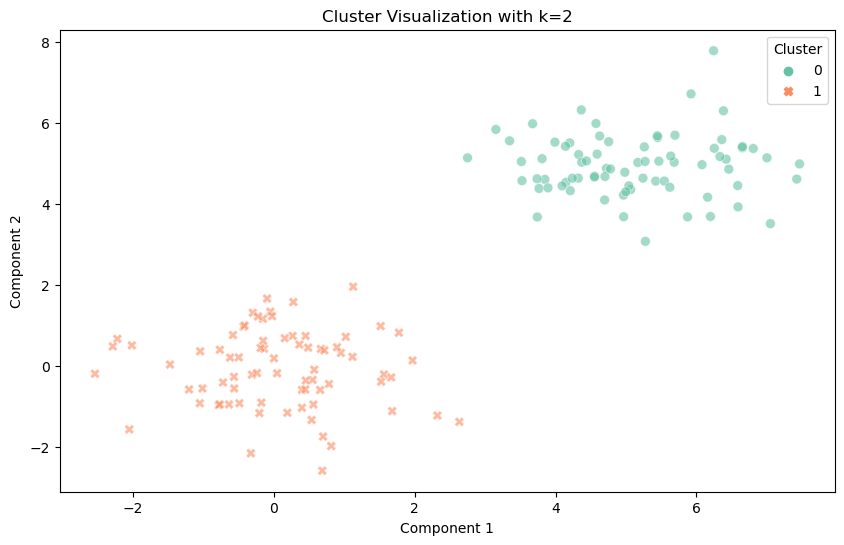

In [5]:
df = pd.DataFrame(x, columns=['Feature 1', 'Feature 2'])
df['Cluster'] = y_cluster2

sns.set_palette("colorblind", n_colors=2)

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Feature 1', y='Feature 2', hue='Cluster', style='Cluster', palette='Set2', s=50, alpha=0.6)

plt.title('Cluster Visualization with k=2')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.legend(title='Cluster', loc='upper right')
plt.show()

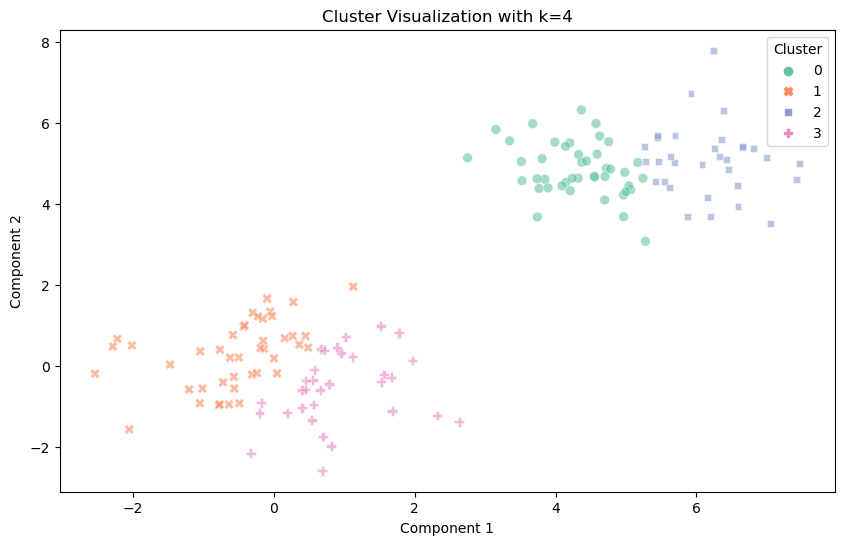

In [6]:
df['Cluster4'] = y_cluster4  

sns.set_palette("colorblind", n_colors=4)

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Feature 1', y='Feature 2', hue='Cluster4', style='Cluster4', palette='Set2', s=50, alpha=0.6)

plt.title('Cluster Visualization with k=4')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.legend(title='Cluster', loc='upper right')
plt.show()

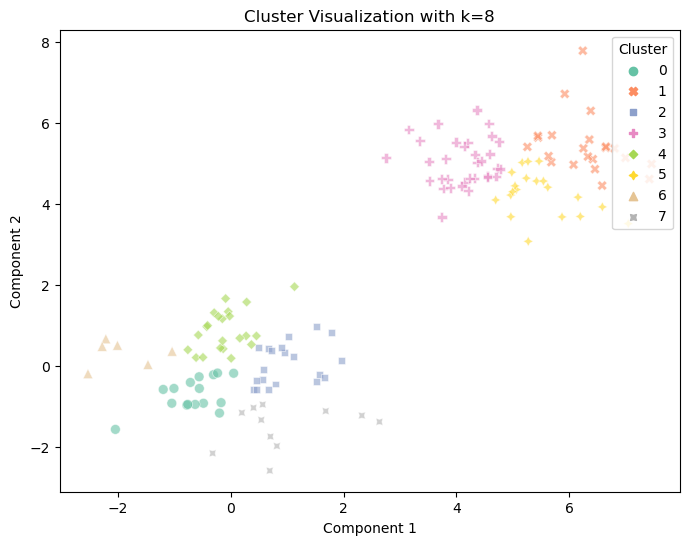

In [7]:
df['Cluster8'] = y_cluster8  

sns.set_palette("colorblind", n_colors=8)

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Feature 1', y='Feature 2', hue='Cluster8', style='Cluster8', palette='Set2', s=50, alpha=0.6)

plt.title('Cluster Visualization with k=8')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.legend(title='Cluster', loc='upper right')
plt.show()

Now we will evaluate the quality of the aggregation process. To do this, we will use the silhouette function that calculates the silhouette of each sample.

The silhouette function returns, for each sample, the cluster to which it has been assigned, the neighboring cluster, and the silhouette value.

In [8]:
silhouette_avg2 = silhouette_score(x, y_cluster2)
silhouette_avg4 = silhouette_score(x, y_cluster4)
silhouette_avg8 = silhouette_score(x, y_cluster8)

# To get the silhouette scores for each sample, use silhouette_samples
silhouette_values2 = silhouette_samples(x, y_cluster2)
silhouette_values4 = silhouette_samples(x, y_cluster4)
silhouette_values8 = silhouette_samples(x, y_cluster8)

# Printing average silhouette scores for each k
print(f'Average silhouette score for k=2: {silhouette_avg2}')
print(f'Average silhouette score for k=4: {silhouette_avg4}')
print(f'Average silhouette score for k=8: {silhouette_avg8}')

Average silhouette score for k=2: 0.7609301350925919
Average silhouette score for k=4: 0.3704279477074552
Average silhouette score for k=8: 0.3669462848307498


As can be seen, clustering with two clusters is better than with four or eight, which is logical considering how the data were generated.

**Summary**

Up to now, we have explored an unsupervised learning process with a focus on clustering, particularly utilizing the k-means algorithm. Clustering helps identify groupings or clusters in data where each group consists of data points that are more similar to each other than to those in different clusters.

Initially, we created synthetic data points centered around two distinct locations, forming two clear groups. This controlled setup was chosen to see if k-means could recognize and replicate the groups we created based on the data alone.

We ran the k-means clustering algorithm with varying numbers of clusters — 2, 4, and 8 — to see how it would organize the data. The k-means algorithm assigns each data point to the nearest cluster center (also known as a centroid), and through iterative optimization, it adjusts these centers to minimize the distance of points within each cluster.

Post clustering, we assigned labels to the data points and used visualization techniques to observe the clustering. The color-coded plots showed us how the algorithm segregated the data points based on the number of clusters specified.

To quantitatively evaluate the quality of our clustering, we calculated the average silhouette score for each setup. This score gauges how well a data point fits within its assigned cluster compared to other clusters. A higher average silhouette score indicated that two clusters provided a more meaningful and distinct grouping than four or eight clusters, which was expected due to our initial data generation strategy.

Lastly, a best practice in understanding and interpreting clustered data, especially when dealing with real-world data, is to assign meaningful names to each cluster. Naming clusters helps in contextualizing the data and can provide insights into the characteristics that define each cluster. In the next steps, using real data, we'll demonstrate the significance of naming clusters to enhance comprehension of the clustering results, offering a clearer, more tangible grasp of the groups within the data.

This iterative process of analyzing clusters, evaluating their quality, and interpreting the results is a foundational aspect of unsupervised machine learning, particularly beneficial for someone at the beginning stages of learning these concepts.

## K-Means Clustering Method with Real Data

Next, we will look at another example of how clustering models are used. For this purpose, we will use the penguins dataset. This database is described at https://cran.r-project.org/web/packages/palmerpenguins/index.html and contains measurements of size, nesting observations, and blood isotope ratios of three species of penguins observed on three islands of the Palmer Archipelago in Antarctica over a three-year study period.

This dataset has been previously processed to ensure that the data are clean and error-free. If this were not the case, we would first need to look for errors, null values, or outliers. We should try to discretize or eliminate columns. Even performing this last step several times to check the different results and choose the one that gives us the best performance. Nevertheless, it contains some null values that we will proceed to ignore.

Let's visualize the structure and summary of the data.

In [9]:
penguins = sns.load_dataset('penguins')

In [10]:
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [11]:
penguins.species.unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

As can be seen, this database is intended for supervised classification problems aimed at classifying each type of penguin into one of the three existing classes or species (Adelie, Gentoo, or Chinstrap). As in this example, we will use an unsupervised method; we will transform the original supervised problem into an unsupervised one. To achieve this, we will not use the column 'species', which is the variable to be predicted. Therefore, we will try to find groupings using only the four numerical attributes that characterize each species of penguin.

Load the data and keep only the four columns that define each species.

In [12]:
x = penguins.dropna().iloc[:, 2:6]
x.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,39.1,18.7,181.0,3750.0
1,39.5,17.4,186.0,3800.0
2,40.3,18.0,195.0,3250.0
4,36.7,19.3,193.0,3450.0
5,39.3,20.6,190.0,3650.0


We plot the average silhouette values for each test to determine which number of clusters is best.

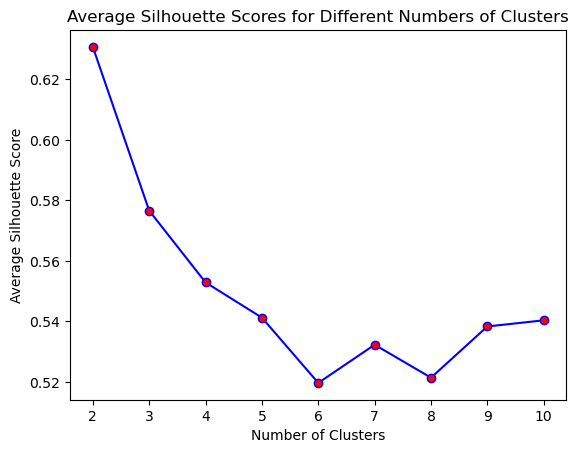

In [13]:
d = pairwise_distances(x)

results = []

# Test different numbers of clusters
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=0, n_init=10).fit(x)
    cluster_labels = kmeans.labels_
    silhouette_avg = silhouette_score(d, cluster_labels, metric="precomputed")
    results.append(silhouette_avg)

# Plot the average silhouette scores for each number of clusters
plt.plot(range(2, 11), results, 'o-', color='blue', markerfacecolor='red')
plt.title("Average Silhouette Scores for Different Numbers of Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Average Silhouette Score")
plt.show()

Although one would expect the optimal value for k to be 3, it seems from the graph that k = 4 or even k = 5 is better. Another way to evaluate which is the best number of clusters is to consider the best model, the one that offers the smallest sum of the squares of the distances of the points of each group with respect to its center (withinss), with the greatest separation between group centers (betweenss). As can be seen, this is a conceptually similar idea to the silhouette. A common way to select the number of clusters is to apply the elbow method, which is nothing more than the selection of the number of clusters based on the inspection of the graph obtained by iterating with the same dataset for different values of the number of clusters. The value found at the "elbow" of the curve will be selected.

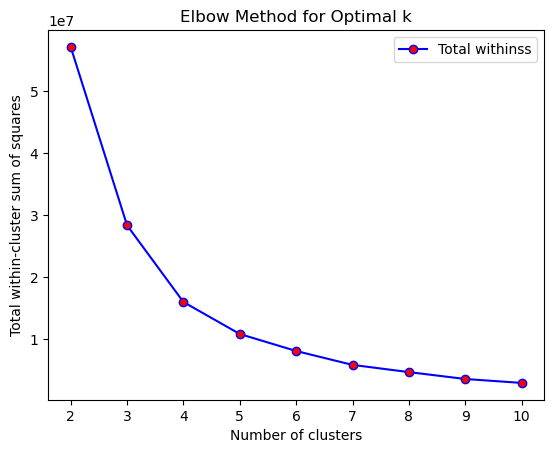

In [14]:
results = np.zeros(11)  
for i in range(2, 11):  
    kmeans = KMeans(n_clusters=i, random_state=0, n_init=10).fit(x)
    results[i] = kmeans.inertia_ 

plt.plot(range(2, 11), results[2:11], 'o-', color='blue', label='Total withinss', markerfacecolor='red')
plt.xlabel('Number of clusters')
plt.ylabel('Total within-cluster sum of squares')
plt.title('Elbow Method for Optimal k')
plt.legend()
plt.show()

We can select the best number of clusters according to two criteria: the average silhouette width ("asw") and the Calinski-Harabasz index ("ch"):

Optimal number of clusters according to average silhouette width: 2
Optimal number of clusters according to Calinski-Harabasz index: 10


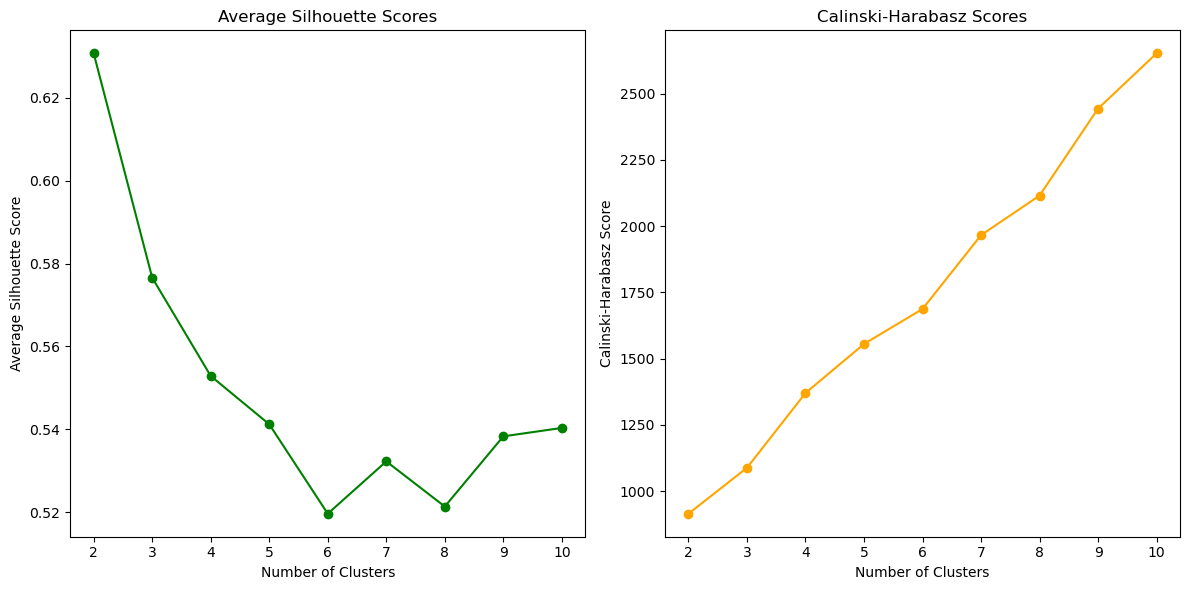

In [15]:
def kmeans_runs(X, k_range, criterion):
    scores = []
    for k in k_range:
        kmeans = KMeans(n_clusters=k, n_init=10, random_state=0).fit(X)
        labels = kmeans.labels_
        if criterion == 'asw' and k > 1:  # silhouette score is only valid for k > 1
            score = silhouette_score(X, labels)
        elif criterion == 'ch':
            score = calinski_harabasz_score(X, labels)
        scores.append(score)
    return k_range[np.argmax(scores)], scores

optimal_k_asw, scores_asw = kmeans_runs(x, range(2, 11), 'asw')
optimal_k_ch, scores_ch = kmeans_runs(x, range(2, 11), 'ch')

print(f'Optimal number of clusters according to average silhouette width: {optimal_k_asw}')
print(f'Optimal number of clusters according to Calinski-Harabasz index: {optimal_k_ch}')

# Plot the scores for visual inspection
plt.figure(figsize=(12, 6))

# Adjusted range to start from 2 for silhouette scores
plt.subplot(1, 2, 1)
plt.plot(range(2, 11), scores_asw, 'o-', color='green')
plt.title('Average Silhouette Scores')
plt.xlabel('Number of Clusters')
plt.ylabel('Average Silhouette Score')

# Calinski-Harabasz index can start from 2 as well
plt.subplot(1, 2, 2)
plt.plot(range(2, 11), scores_ch, 'o-', color='orange')
plt.title('Calinski-Harabasz Scores')
plt.xlabel('Number of Clusters')
plt.ylabel('Calinski-Harabasz Score')

plt.tight_layout()
plt.show()

**What we've done?**

Throughout this code, we have implemented a Python script to determine the optimal number of clusters for a dataset using the K-Means clustering algorithm. This method is part of unsupervised machine learning, where we aim to identify natural groupings within data without predefined labels.

To accomplish this, we utilized two distinct metrics:

- **Average Silhouette Width (ASW):** This metric measures how similar an object is to its own cluster compared to other clusters. The silhouette score ranges from -1 to +1, where a high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters. If most objects have a high value, the clustering configuration is appropriate. An average silhouette width close to 1 suggests that the clusters are well apart from each other and clearly defined.

- **Calinski-Harabasz Index (CH):** Also known as the Variance Ratio Criterion, this index is used to evaluate the cluster validity. It is calculated by the ratio of the sum of between-clusters dispersion and of within-cluster dispersion for all clusters. Essentially, a higher CH score indicates that the clusters are dense and well separated, which is considered to be better.

In the given scenario, after running the kmeans_runs function across a range of k values (from 2 to 10), the optimal number of clusters was found to be different depending on the metric used:

- According to the __average silhouette width__, the optimal number of clusters is 2. This suggests that when the dataset is partitioned into two clusters, the data points within each cluster are more similar to each other than to points in different clusters.


- According to the __Calinski-Harabasz index__, the optimal number of clusters is 10. This result implies that ten clusters provide the best separation and density as per the CH criterion.

These contrasting outcomes indicate that the choice of the number of clusters may depend on the context and interpretation of the clustering results. The silhouette score is based on a concept of cohesion and separation, while the CH index is derived from the dispersion ratios. It is also worth noting that sometimes these metrics can give conflicting results, as seen here, which is why it is important to consider the domain knowledge and the purpose of the clustering when making a final decision on the number of clusters to use.


As in the case we are studying, we know that the data can be grouped into 3 classes or species, let's see how kmeans has performed when asked for 3 clusters. For this, we visually compare the fields two by two, with the real value that we know is stored in the "species" field of the original dataset.

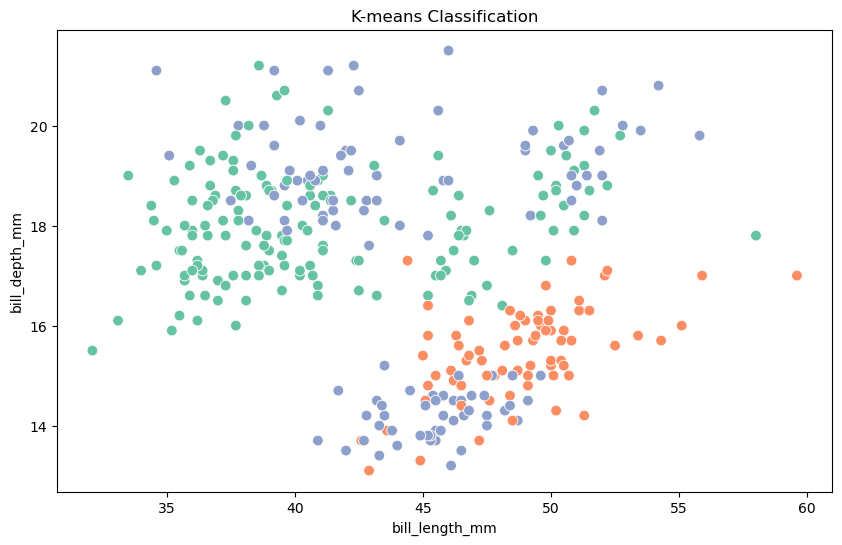

In [16]:
penguins3clusters = KMeans(n_clusters=3, n_init=10).fit(x)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=x.iloc[:, 0], y=x.iloc[:, 1], hue=penguins3clusters.labels_, palette='Set2', s=60, legend=None)
plt.title("K-means Classification")
plt.show()

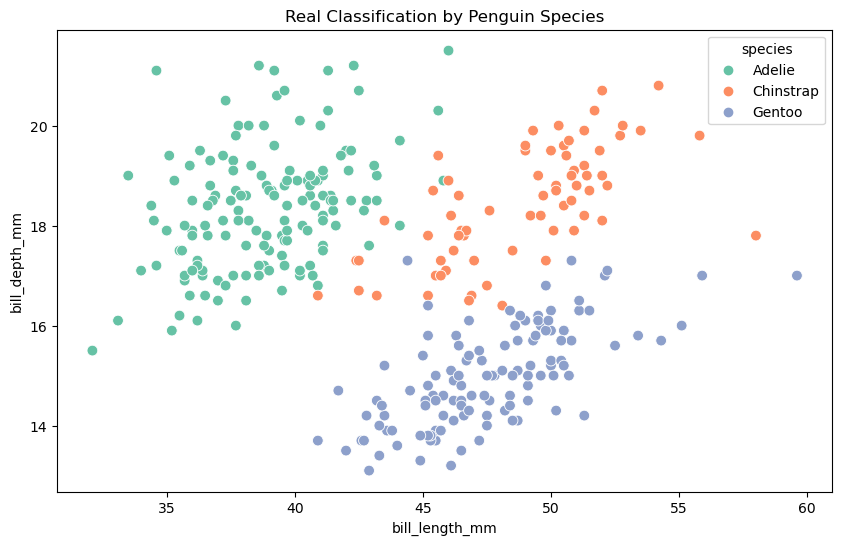

In [17]:
filtered_penguins = penguins.loc[x.index]

plt.figure(figsize=(10, 6))
sns.scatterplot(data=filtered_penguins, x='bill_length_mm', y='bill_depth_mm', hue='species', palette='Set2', s=60)
plt.title("Real Classification by Penguin Species")
plt.show()

We can observe that flipper_length and body_mass are not good indicators to differentiate the three subspecies, since two of the subspecies are too mixed together to distinguish anything.

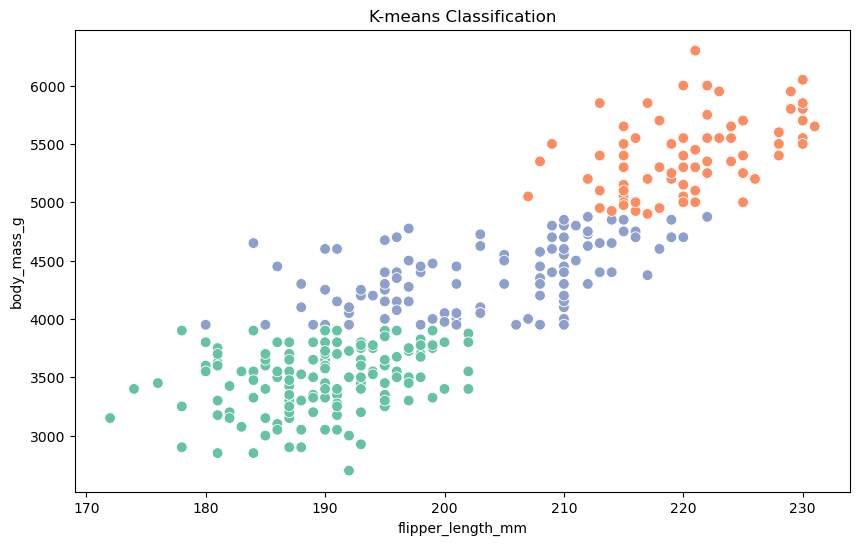

In [18]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=x.iloc[:, 2], y=x.iloc[:, 3], hue=penguins3clusters.labels_, palette='Set2', s=60, legend=None)
plt.title("K-means Classification")
plt.show()
plt.show()

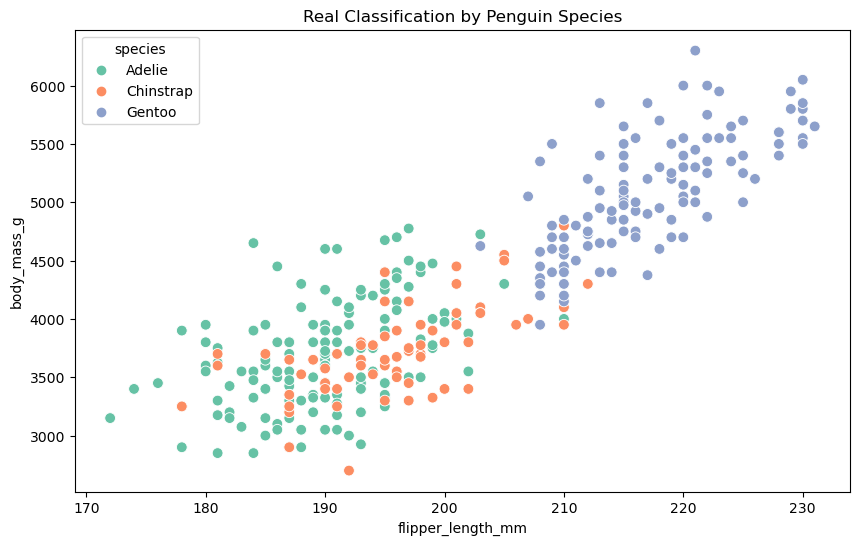

In [19]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=filtered_penguins, x='flipper_length_mm', y='body_mass_g', hue='species', palette='Set2', s=60)
plt.title("Real Classification by Penguin Species")
plt.show()

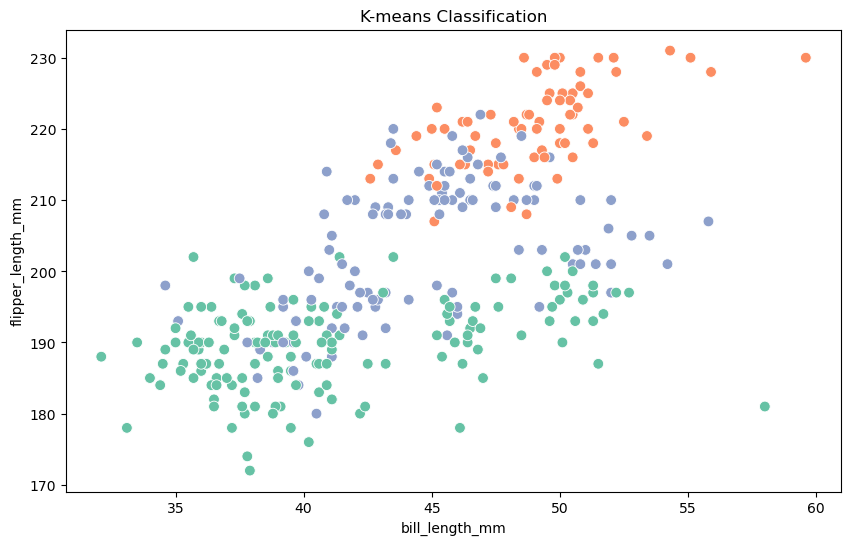

In [20]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=x.iloc[:, 0], y=x.iloc[:, 2], hue=penguins3clusters.labels_, palette='Set2', s=60, legend=None)
plt.title("K-means Classification")
plt.show()
plt.show()

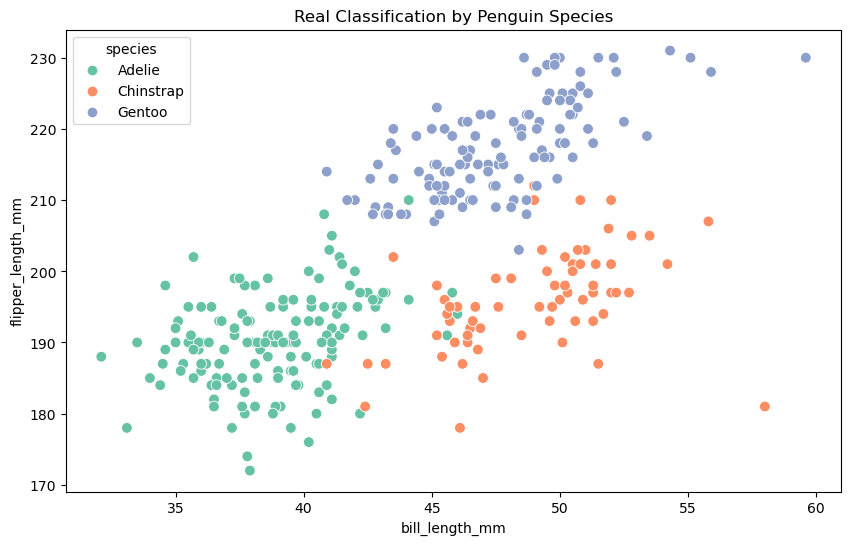

In [21]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=filtered_penguins, y='flipper_length_mm', x='bill_length_mm', hue='species', palette='Set2', s=60)
plt.title("Real Classification by Penguin Species")
plt.show()

The two bill measurements seem to achieve better results when dividing the three species of penguins. The group formed by the black points that the algorithm has found matches those of the Adelie species. The other two groups, however, intermingle somewhat more, and there are certain points that are classified as Gentoo (green) when they are actually Chinstrap (red).

A good technique that helps to understand the groups that have been formed is to try to name them. For example:

Group 1: Only Adelie (black color)
Group 2: Mainly Chinstrap (red color)
Group 3: Mix of Gentoo (green color) and Adelie (black color)
This helps us understand how the groups are formed and refer to them in subsequent analyses.

All of this indicates that the number of groups or clusters in a dataset is not an aspect that we can ensure we will always find accurately and objectively, quite the contrary, it is an area that requires analysis in itself.

### How can we choose the number of clusters?

Clustering algorithms are very popular because they can be applied to both supervised and unsupervised data to better understand their nature and uncover any internal structure that allows grouping and describing them according to some criteria. Basically, it's about partitioning the dataset into k disjoint subgroups in such a way that we obtain a classification of the data based on their nature, which we hope will reveal some information about them.

The main problem with many clustering algorithms is that you have to choose the number of clusters k to decide optimally how many subgroups a dataset can be divided into, taking into account the nature of the problem you want to solve, but also the chosen clustering algorithm.

Many indicators have been developed that tell us how good a solution based on k clusters is. Most take into account geometric aspects, for example, if the clusters are spherical, if they are very separated, etc. Unfortunately, there is no one criterion better than the others, and everything depends on the nature of the data, and also if we have some idea about the number of clusters we hope to find. What is usually done is to test different values of k in a range and decide which is optimal according to a chosen indicator. We have changed the question, from having to choose k, now we have to choose the right indicator! In addition, for large datasets and large k ranges, computing time can be very high.

The problem is that for the same algorithm and the same dataset, different indicators or criteria to choose k provide different results, so there is no way to ensure that we have found the optimum. However, if most indicators agree on the same k value and the solution found seems appropriate for the problem we want to solve, it can help us.